In [95]:
#Pyspark Installation
!pip install pyspark

In [96]:
# Data Mainpulation / Linear Algebra Package Load
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [1]:
#Pyspark Package Load - Data Mainpulation / SQL Syntax / Machine Learning
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator



In [ ]:
#Spark Session Create
spark = SparkSession.builder.appName('Housing_Price_Index_Analysis').getOrCreate()

#File Load
df_housing = spark.read.csv('HPI_AT_BDL_ZIP5.csv', header=True, inferSchema=True)
df_zillow = spark.read.csv('Zip_Zhvi_Summary_AllHomes.csv', header=True, inferSchema=True)
    

In [2]:
#First 5 rows - Housing 
df_housing.head(5)

[Row(Five-Digit ZIP Code=1001, Year=1985, Annual Change (%)='.', HPI='100.00', HPI with 1990 base='62.15', HPI with 2000 base='61.41', _c6=None, _c7=None),
 Row(Five-Digit ZIP Code=1001, Year=1986, Annual Change (%)='13.67', HPI='113.67', HPI with 1990 base='70.65', HPI with 2000 base='69.80', _c6=None, _c7=None),
 Row(Five-Digit ZIP Code=1001, Year=1987, Annual Change (%)='21.20', HPI='137.77', HPI with 1990 base='85.63', HPI with 2000 base='84.60', _c6=None, _c7=None),
 Row(Five-Digit ZIP Code=1001, Year=1988, Annual Change (%)='17.38', HPI='161.72', HPI with 1990 base='100.52', HPI with 2000 base='99.31', _c6=None, _c7=None),
 Row(Five-Digit ZIP Code=1001, Year=1989, Annual Change (%)='1.14', HPI='163.57', HPI with 1990 base='101.67', HPI with 2000 base='100.45', _c6=None, _c7=None)]

In [3]:
#First 5 rows - Zillow
df_zillow.head(5)

[Row(Date=datetime.date(2020, 3, 31), RegionID=61639, RegionName=10025, State='NY', Metro='New York-Newark-Jersey City', County='New York County', City='New York', SizeRank=0, Zhvi=1085142, MoM=-0.000332742488632599, QoQ=None, YoY=None, 5Year=None, 10Year=None, PeakMonth=datetime.datetime(2016, 12, 1, 0, 0), PeakQuarter='2016-Q4', PeakZHVI=1274615, PctFallFromPeak=-0.148651161331069, LastTimeAtCurrZHVI=datetime.datetime(2014, 4, 1, 0, 0)),
 Row(Date=datetime.date(2020, 3, 31), RegionID=84654, RegionName=60657, State='IL', Metro='Chicago-Naperville-Elgin', County='Cook County', City='Chicago', SizeRank=1, Zhvi=491246, MoM=3.59533587470651e-05, QoQ=None, YoY=None, 5Year=None, 10Year=None, PeakMonth=datetime.datetime(2018, 12, 1, 0, 0), PeakQuarter='2018-Q4', PeakZHVI=499880, PctFallFromPeak=-0.0172721453148756, LastTimeAtCurrZHVI=datetime.datetime(2017, 12, 1, 0, 0)),
 Row(Date=datetime.date(2020, 3, 31), RegionID=61637, RegionName=10023, State='NY', Metro='New York-Newark-Jersey City', 

In [4]:
#Statistical Summary - Housing / Zillow
df_housing.printSchema()
df_zillow.printSchema()

root
 |-- Five-Digit ZIP Code: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Annual Change (%): string (nullable = true)
 |-- HPI: string (nullable = true)
 |-- HPI with 1990 base: string (nullable = true)
 |-- HPI with 2000 base: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)

root
 |-- Date: date (nullable = true)
 |-- RegionID: integer (nullable = true)
 |-- RegionName: integer (nullable = true)
 |-- State: string (nullable = true)
 |-- Metro: string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SizeRank: integer (nullable = true)
 |-- Zhvi: integer (nullable = true)
 |-- MoM: double (nullable = true)
 |-- QoQ: string (nullable = true)
 |-- YoY: string (nullable = true)
 |-- 5Year: string (nullable = true)
 |-- 10Year: string (nullable = true)
 |-- PeakMonth: timestamp (nullable = true)
 |-- PeakQuarter: string (nullable = true)
 |-- PeakZHVI: integer (nullable = 

In [5]:
#Housing Columns
df_housing.columns


['Five-Digit ZIP Code',
 'Year',
 'Annual Change (%)',
 'HPI',
 'HPI with 1990 base',
 'HPI with 2000 base',
 '_c6',
 '_c7']

In [6]:
#Zillow Columns
df_zillow.columns

['Date',
 'RegionID',
 'RegionName',
 'State',
 'Metro',
 'County',
 'City',
 'SizeRank',
 'Zhvi',
 'MoM',
 'QoQ',
 'YoY',
 '5Year',
 '10Year',
 'PeakMonth',
 'PeakQuarter',
 'PeakZHVI',
 'PctFallFromPeak',
 'LastTimeAtCurrZHVI']

In [7]:
#Statistical Sum. - Housing
df_housing.select([
    'Year',
    'Annual Change (%)',
    'HPI',
    'HPI with 1990 base',
    'HPI with 2000 base']
).describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|              Year| Annual Change (%)|               HPI|HPI with 1990 base|HPI with 2000 base|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|            583050|            583050|            583050|            583050|            583050|
|   mean|2003.4646668381786|3.6875284685715584|231.92593147524414|  152.142214859443|112.99945554282924|
| stddev|11.061539156110683|7.5356645410384235|180.76179019482916| 72.06262025591505| 45.23156716825102|
|    min|              1975|             -0.01|                 .|                 .|                 .|
|    max|              2020|             94.74|            999.87|             99.99|             99.99|
+-------+------------------+------------------+------------------+------------------+------------------+



In [8]:
#Statistical Sum. - Zillow
df_zillow.select([
'Date',
'RegionID',
'RegionName',
'State',
'Metro',
'County',
'City',
'SizeRank',
'Zhvi']
).describe().show()

+-------+------------------+------------------+-----+--------+----------------+---------+-----------------+------------------+
|summary|          RegionID|        RegionName|State|   Metro|          County|     City|         SizeRank|              Zhvi|
+-------+------------------+------------------+-----+--------+----------------+---------+-----------------+------------------+
|  count|             30134|             30134|30134|   22985|           30134|    30134|            30134|             30134|
|   mean| 80199.78867724165|48245.237870843564| null|    null|            null|     null|          15066.5| 220009.3946704719|
| stddev|25517.682012196103|27208.650808521666| null|    null|            null|     null|8699.080842249945|214881.17667935032|
|    min|             58001|               501|   AK|Aberdeen|Abbeville County|Abbeville|                0|             11492|
|    max|            753844|             99929|   WY|  Zapata|   Zavala County|   Zwolle|            30133|    

In [9]:
#Statistical Sum. - Zillow
df_zillow.select([
'MoM',
'QoQ',
'YoY',
'5Year',
'10Year',
'PeakMonth',
'PeakQuarter',
'PeakZHVI',
'PctFallFromPeak',
'LastTimeAtCurrZHVI']
).describe().show()

+-------+--------------------+----+----+-----+------+-----------+------------------+--------------------+
|summary|                 MoM| QoQ| YoY|5Year|10Year|PeakQuarter|          PeakZHVI|     PctFallFromPeak|
+-------+--------------------+----+----+-----+------+-----------+------------------+--------------------+
|  count|               30134|   0|   0|    0|     0|      30134|             30134|               30134|
|   mean|2.927406339352759...|null|null| null|  null|       null|229228.32786885247|-0.03261201551657523|
| stddev|6.421417515461265E-5|null|null| null|  null|       null|226264.79354344108| 0.06616423005174453|
|    min|-4.53619671364625E-4|null|null| null|  null|    1996-Q1|             11492|  -0.740226434599366|
|    max| 4.57225603361925E-4|null|null| null|  null|    2020-Q1|           6612392|                 0.0|
+-------+--------------------+----+----+-----+------+-----------+------------------+--------------------+



In [10]:
#Framing data types / column names - Housing
pd.DataFrame(df_housing.dtypes, columns = ['Column Name', 'Data type'])

NameError: name 'pd' is not defined

In [ ]:
#Framing data types / column names - Zillow
pd.DataFrame(df_zillow.dtypes, columns = ['Column Name', 'Data type'])

,Column Name,Data type
0,Date,date
1,RegionID,int
2,RegionName,int
3,State,string
4,Metro,string
5,County,string
6,City,string
7,SizeRank,int
8,Zhvi,int
9,MoM,double


In [ ]:
#Renaming column names
df_housing = df_housing.withColumnRenamed('Five-Digit ZIP Code', 'ZipCode')
df_zillow = df_zillow.withColumnRenamed('RegionName', 'ZipCode')

In [ ]:
#Assinging Dataset Name
datasets = {'Zip_Zhvi_Summary_AllHomes': df_housing, 'HPI_AT_BDL_ZIP5': df_zillow}

#Missing value count function 
for name, df in datasets.items():
    print(f"Checking dataset: {name}")
    for col in df.columns:
        missing_count = df.filter(df[col].isNull()).count()
        print(f"Number of missing values in {col}: {missing_count}")
    print("\n")

Checking dataset: Zip_Zhvi_Summary_AllHomes
Number of missing values in ZipCode: 0
Number of missing values in Year: 0
Number of missing values in Annual Change (%): 0
Number of missing values in HPI: 0
Number of missing values in HPI with 1990 base: 0
Number of missing values in HPI with 2000 base: 0
Number of missing values in _c6: 583050
Number of missing values in _c7: 583050


Checking dataset: HPI_AT_BDL_ZIP5
Number of missing values in Date: 0
Number of missing values in RegionID: 0
Number of missing values in ZipCode: 0
Number of missing values in State: 0
Number of missing values in Metro: 7149
Number of missing values in County: 0
Number of missing values in City: 0
Number of missing values in SizeRank: 0
Number of missing values in Zhvi: 0
Number of missing values in MoM: 0
Number of missing values in QoQ: 30134
Number of missing values in YoY: 30134
Number of missing values in 5Year: 30134
Number of missing values in 10Year: 30134
Number of missing values in PeakMonth: 0
Nu

In [ ]:
#First 10, _C6 / _C7 Columns
df_housing['_c6', '_c7'].head(10)



[Row(_c6=None, _c7=None),
 Row(_c6=None, _c7=None),
 Row(_c6=None, _c7=None),
 Row(_c6=None, _c7=None),
 Row(_c6=None, _c7=None),
 Row(_c6=None, _c7=None),
 Row(_c6=None, _c7=None),
 Row(_c6=None, _c7=None),
 Row(_c6=None, _c7=None),
 Row(_c6=None, _c7=None)]

In [ ]:
#
df_zillow['Metro', 'QoQ', 'YoY', '5Year', '10Year','LastTimeAtCurrZHVI'].head(10)

[Row(Metro='New York-Newark-Jersey City', QoQ=None, YoY=None, 5Year=None, 10Year=None, LastTimeAtCurrZHVI=datetime.datetime(2014, 4, 1, 0, 0)),
 Row(Metro='Chicago-Naperville-Elgin', QoQ=None, YoY=None, 5Year=None, 10Year=None, LastTimeAtCurrZHVI=datetime.datetime(2017, 12, 1, 0, 0)),
 Row(Metro='New York-Newark-Jersey City', QoQ=None, YoY=None, 5Year=None, 10Year=None, LastTimeAtCurrZHVI=datetime.datetime(2015, 5, 1, 0, 0)),
 Row(Metro='Houston-The Woodlands-Sugar Land', QoQ=None, YoY=None, 5Year=None, 10Year=None, LastTimeAtCurrZHVI=datetime.datetime(2015, 6, 1, 0, 0)),
 Row(Metro='Chicago-Naperville-Elgin', QoQ=None, YoY=None, 5Year=None, 10Year=None, LastTimeAtCurrZHVI=datetime.datetime(2017, 3, 1, 0, 0)),
 Row(Metro='Houston-The Woodlands-Sugar Land', QoQ=None, YoY=None, 5Year=None, 10Year=None, LastTimeAtCurrZHVI=datetime.datetime(2020, 3, 1, 0, 0)),
 Row(Metro='New York-Newark-Jersey City', QoQ=None, YoY=None, 5Year=None, 10Year=None, LastTimeAtCurrZHVI=datetime.datetime(2019, 9

In [ ]:
df_housing = df_housing.drop('_c6', '_c7')
df_zillow = df_zillow.drop('QoQ', 'YoY', '5Year', '10Year')

In [ ]:
from pyspark.sql.functions import col

housing_cols = ['ZipCode', 'Year', 'Annual Change (%)', 'HPI', 'HPI with 1990 base', 'HPI with 2000 base', '_c6', '_c7']
zillow_cols = ['Date', 'RegionID', 'ZipCode', 'State', 'Metro', 'County', 'City', 'SizeRank', 'Zhvi', 'MoM', 'QoQ', 'YoY', '5Year', '10Year', 'PeakMonth', 'PeakQuarter', 'PeakZHVI', 'PctFallFromPeak', 'LastTimeAtCurrZHVI']

df_housing = df_housing.select([col(c).alias(c + '_housing') if c in housing_cols else c for c in df_housing.columns])

df_zillow = df_zillow.select([col(c).alias(c + '_zillow') if c in zillow_cols else c for c in df_zillow.columns])


In [ ]:
joined_df = df_housing.join(df_zillow, df_housing.ZipCode_housing == df_zillow.ZipCode_zillow, 'inner')


In [ ]:
joined_df.head(5)

[Row(ZipCode_housing=1001, Year_housing=1985, Annual Change (%)_housing='.', HPI_housing='100.00', HPI with 1990 base_housing='62.15', HPI with 2000 base_housing='61.41', Date_zillow=datetime.date(2020, 3, 31), RegionID_zillow=58196, ZipCode_zillow=1001, State_zillow='MA', Metro_zillow='Springfield', County_zillow='Hampden County', City_zillow='Agawam', SizeRank_zillow=6265, Zhvi_zillow=228688, MoM_zillow=2.31761710407833e-05, PeakMonth_zillow=datetime.datetime(2020, 3, 1, 0, 0), PeakQuarter_zillow='2020-Q1', PeakZHVI_zillow=228688, PctFallFromPeak_zillow=0.0, LastTimeAtCurrZHVI_zillow=datetime.datetime(2020, 3, 1, 0, 0)),
 Row(ZipCode_housing=1001, Year_housing=1986, Annual Change (%)_housing='13.67', HPI_housing='113.67', HPI with 1990 base_housing='70.65', HPI with 2000 base_housing='69.80', Date_zillow=datetime.date(2020, 3, 31), RegionID_zillow=58196, ZipCode_zillow=1001, State_zillow='MA', Metro_zillow='Springfield', County_zillow='Hampden County', City_zillow='Agawam', SizeRank_

In [ ]:
pd.DataFrame(joined_df.dtypes, columns = ['Column Name', 'Data type'])

,Column Name,Data type
0,ZipCode_housing,int
1,Year_housing,int
2,Annual Change (%)_housing,string
3,HPI_housing,string
4,HPI with 1990 base_housing,string
5,HPI with 2000 base_housing,string
6,Date_zillow,date
7,RegionID_zillow,int
8,ZipCode_zillow,int
9,State_zillow,string


In [ ]:
joined_df['Annual Change (%)_housing',
          'HPI_housing',
          'HPI with 1990 base_housing', 
          'HPI with 2000 base_housing', 
          'State_zillow', 
          'Metro_zillow', 
          'County_zillow', 
          'City_zillow', 
          'PeakQuarter_zillow'].head(5)

[Row(Annual Change (%)_housing=None, HPI_housing=100.0, HPI with 1990 base_housing=62.15, HPI with 2000 base_housing=61.41, State_zillow='MA', Metro_zillow='Springfield', County_zillow='Hampden County', City_zillow='Agawam', PeakQuarter_zillow='2020-Q1'),
 Row(Annual Change (%)_housing=13.67, HPI_housing=113.67, HPI with 1990 base_housing=70.65, HPI with 2000 base_housing=69.8, State_zillow='MA', Metro_zillow='Springfield', County_zillow='Hampden County', City_zillow='Agawam', PeakQuarter_zillow='2020-Q1'),
 Row(Annual Change (%)_housing=21.2, HPI_housing=137.77, HPI with 1990 base_housing=85.63, HPI with 2000 base_housing=84.6, State_zillow='MA', Metro_zillow='Springfield', County_zillow='Hampden County', City_zillow='Agawam', PeakQuarter_zillow='2020-Q1'),
 Row(Annual Change (%)_housing=17.38, HPI_housing=161.72, HPI with 1990 base_housing=100.52, HPI with 2000 base_housing=99.31, State_zillow='MA', Metro_zillow='Springfield', County_zillow='Hampden County', City_zillow='Agawam', Pea

In [ ]:
string_cols = ['Annual Change (%)_housing',
          'HPI_housing',
          'HPI with 1990 base_housing', 
          'HPI with 2000 base_housing', 
          'State_zillow', 
          'Metro_zillow', 
          'County_zillow', 
          'City_zillow', 
          'PeakQuarter_zillow']
for col_name in string_cols:
    joined_df = joined_df.withColumn(col_name, col(col_name).cast('double'))
    
joined_df.printSchema()

root
 |-- ZipCode_housing: integer (nullable = true)
 |-- Year_housing: integer (nullable = true)
 |-- Annual Change (%)_housing: double (nullable = true)
 |-- HPI_housing: double (nullable = true)
 |-- HPI with 1990 base_housing: double (nullable = true)
 |-- HPI with 2000 base_housing: double (nullable = true)
 |-- Date_zillow: date (nullable = true)
 |-- RegionID_zillow: integer (nullable = true)
 |-- ZipCode_zillow: integer (nullable = true)
 |-- State_zillow: double (nullable = true)
 |-- Metro_zillow: double (nullable = true)
 |-- County_zillow: double (nullable = true)
 |-- City_zillow: double (nullable = true)
 |-- SizeRank_zillow: integer (nullable = true)
 |-- Zhvi_zillow: integer (nullable = true)
 |-- MoM_zillow: double (nullable = true)
 |-- PeakMonth_zillow: timestamp (nullable = true)
 |-- PeakQuarter_zillow: double (nullable = true)
 |-- PeakZHVI_zillow: integer (nullable = true)
 |-- PctFallFromPeak_zillow: double (nullable = true)
 |-- LastTimeAtCurrZHVI_zillow: times

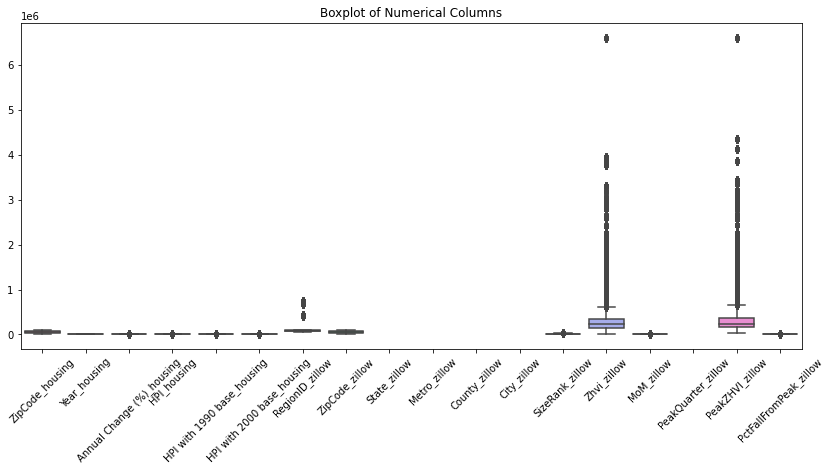

In [ ]:
numerical_columns = [t[0] for t in joined_df.dtypes if t[1] == 'int' or t[1] == 'double']

def boxplot_outlier(df):
    # Convert to Pandas DataFrame for plotting
    pd_df = df.select(numerical_columns).toPandas()

    # Create boxplot
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=pd_df)
    plt.title('Boxplot of Numerical Columns')
    plt.xticks(rotation=45)
    plt.show()
    
boxplot_outlier(joined_df)

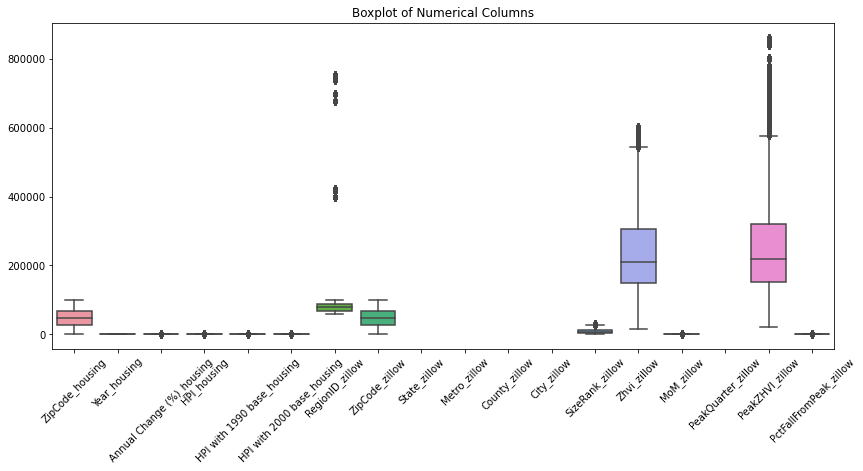

In [ ]:
# Define the columns to check for outliers
outlier_columns = ['HPI with 2000 base_housing', 
                   'Zhvi_zillow'] #PeakQuarter_Zillow, due to too many identical values, unable to calculate for IQR and dropped.

for column in outlier_columns:
        # Calculate Q1, Q3, and IQR
        q1, q3 = joined_df.approxQuantile(column, [0.25, 0.75], 0.01)
        iqr = q3 - q1

        # Calculate lower and upper bounds for outlier detection
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Filter out the outliers and create a new DataFrame
        filtered_df = joined_df.filter((col(column) >= lower_bound) & (col(column) <= upper_bound))

boxplot_outlier(filtered_df)

In [ ]:
pd.DataFrame(filtered_df.dtypes, columns = ['Column Name', 'Data type'])

,Column Name,Data type
0,ZipCode_housing,int
1,Year_housing,int
2,Annual Change (%)_housing,double
3,HPI_housing,double
4,HPI with 1990 base_housing,double
5,HPI with 2000 base_housing,double
6,Date_zillow,date
7,RegionID_zillow,int
8,ZipCode_zillow,int
9,State_zillow,double


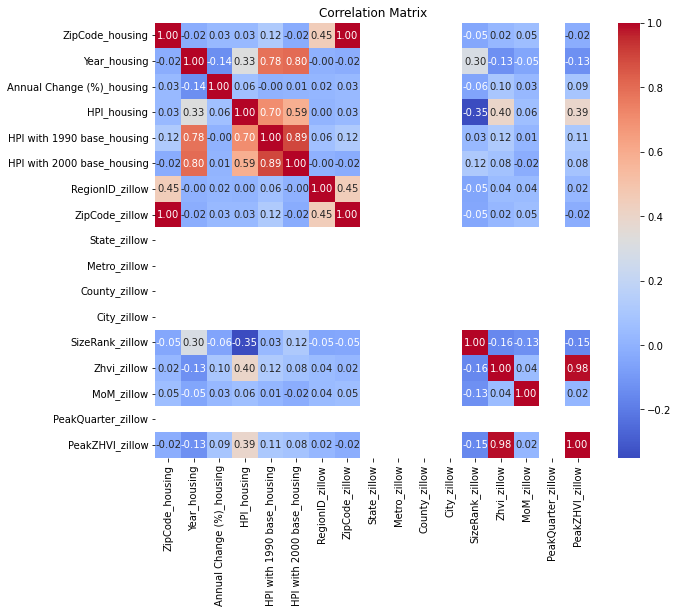

In [ ]:
# Define correlation_cols
selected_cols = ['ZipCode_housing', 
                 'Year_housing', 
                 'Annual Change (%)_housing', 
                 'HPI_housing', 
                 'HPI with 1990 base_housing', 
                 'HPI with 2000 base_housing', 
                 'RegionID_zillow', 
                 'ZipCode_zillow', 
                 'State_zillow', 
                 'Metro_zillow', 
                 'County_zillow', 
                 'City_zillow', 
                 'SizeRank_zillow',
                 'Zhvi_zillow', 
                 'MoM_zillow', 
                 'PeakQuarter_zillow', 
                 'PeakZHVI_zillow']

# Convert DataFrame to Pandas for correlation analysis
correlation_df = filtered_df.select(selected_cols).toPandas()

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()


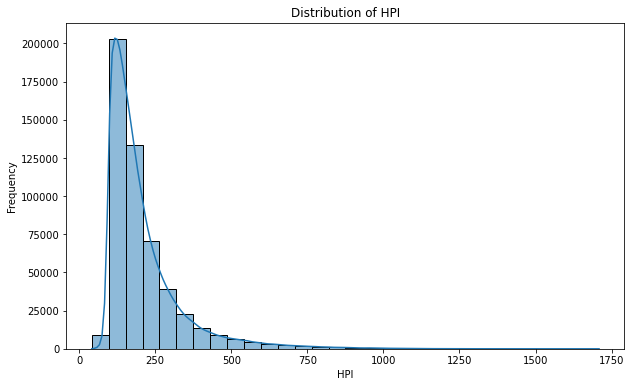

In [ ]:
# Univariate Analysis - Histogram of 'HPI_housing'
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df.toPandas(), x='HPI_housing', bins=30, kde=True)
plt.title('Distribution of HPI')
plt.xlabel('HPI')
plt.ylabel('Frequency')
plt.show()


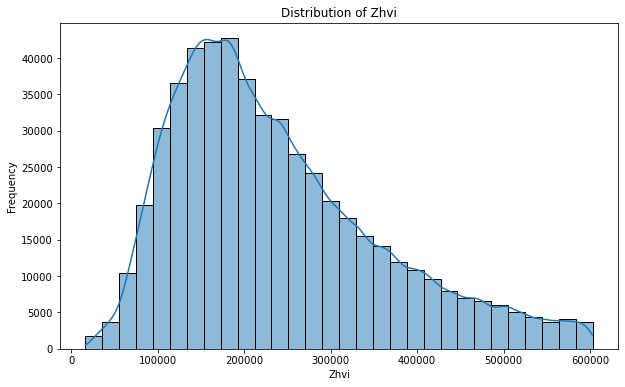

In [ ]:
# Univariate Analysis - Histogram of 'Zhvi'
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df.toPandas(), x='Zhvi_zillow', bins=30, kde=True)
plt.title('Distribution of Zhvi')
plt.xlabel('Zhvi')
plt.ylabel('Frequency')
plt.show()


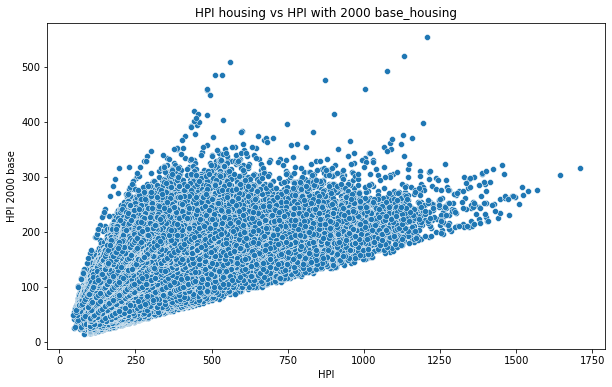

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df.toPandas(), x='HPI_housing', y='HPI with 2000 base_housing')
plt.title('HPI housing vs HPI with 2000 base_housing')
plt.xlabel('HPI')
plt.ylabel('HPI 2000 base')
plt.show()

In [ ]:
print(filtered_df.columns)


['ZipCode_housing', 'Year_housing', 'Annual Change (%)_housing', 'HPI_housing', 'HPI with 1990 base_housing', 'HPI with 2000 base_housing', 'Date_zillow', 'RegionID_zillow', 'ZipCode_zillow', 'State_zillow', 'Metro_zillow', 'County_zillow', 'City_zillow', 'SizeRank_zillow', 'Zhvi_zillow', 'MoM_zillow', 'PeakMonth_zillow', 'PeakQuarter_zillow', 'PeakZHVI_zillow', 'PctFallFromPeak_zillow', 'LastTimeAtCurrZHVI_zillow']


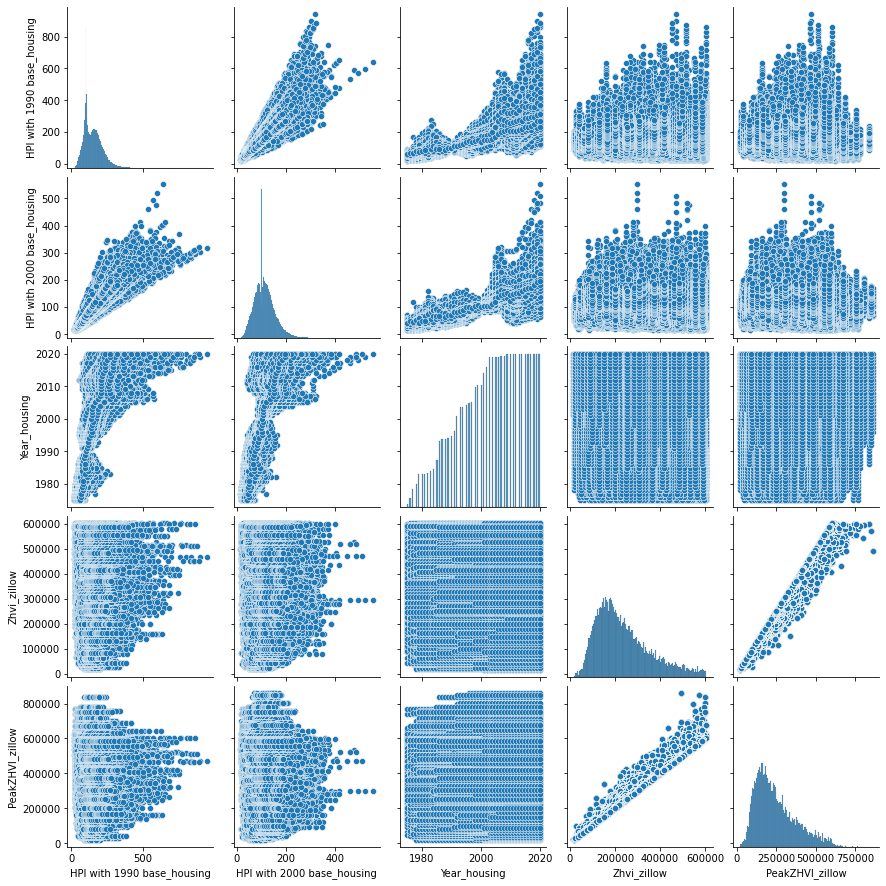

In [ ]:
selected_cols = ['HPI with 1990 base_housing', 
                 'HPI with 2000 base_housing', 
                 'Year_housing', 
                 'Zhvi_zillow',
                 'PeakZHVI_zillow']
sns.pairplot(data=filtered_df.select(selected_cols).toPandas())
plt.show()


In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Select the relevant columns and handle missing values
selected_df = filtered_df.select(
    filtered_df["PeakZHVI_zillow"],
    filtered_df["HPI_housing"],
    filtered_df["Zhvi_zillow"]
).na.drop()

# Create a VectorAssembler to combine the features into a single vector column
assembler = VectorAssembler(
    inputCols=["PeakZHVI_zillow", "HPI_housing"],
    outputCol="features"
)

# Transform the DataFrame to include the features vector column
assembled_df = assembler.transform(selected_df)

# Split the data into training and testing sets
train_data, test_data = assembled_df.randomSplit([0.7, 0.3], seed=42)

# Create a LinearRegression model
lr = LinearRegression(featuresCol="features", labelCol="Zhvi_zillow")

# Fit the model to the training data
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluation = lr_model.evaluate(test_data)

# Print the coefficients and intercept of the model
print("Coefficients: {}".format(lr_model.coefficients))
print("Intercept: {:.2f}".format(lr_model.intercept))
print("Root Mean Squared Error: {:.2f}".format(evaluation.rootMeanSquaredError))


Coefficients: [0.9136213650179829,13.592323851999938]
Intercept: 8430.40
Root Mean Squared Error: 20775.56


In [ ]:
# Select the relevant columns and handle missing values
selected_df = filtered_df.select(
    filtered_df["HPI with 1990 base_housing"],
    filtered_df["HPI with 2000 base_housing"],
    filtered_df["Year_housing"],
    filtered_df["Zhvi_zillow"],
    filtered_df["HPI_housing"]
).na.drop()

# Create a VectorAssembler to combine the features into a single vector column
assembler = VectorAssembler(
    inputCols=["HPI with 1990 base_housing", 
               "HPI with 2000 base_housing",
               "Year_housing"],
    outputCol="features"
)

# Transform the DataFrame to include the features vector column
assembled_df = assembler.transform(selected_df)

# Split the data into training and testing sets
train_data, test_data = assembled_df.randomSplit([0.7, 0.3], seed=48)

# Create a LinearRegression model
lr = LinearRegression(featuresCol="features", labelCol="HPI_housing")

# Fit the model to the training data
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluation = lr_model.evaluate(test_data)

# Print the coefficients and intercept of the model
print("Coefficients: {}".format(lr_model.coefficients))
print("Intercept: {:.2f}".format(lr_model.intercept))
print("Root Mean Squared Error: {:.2f}".format(evaluation.rootMeanSquaredError))


Coefficients: [0.9692146162720007,1.3639003002001002,-1.5845638810836478]
Intercept: 3127.08
Root Mean Squared Error: 103.12
